In [1]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
ticker = "AAPL"
benchmark = "^GSPC"
start_date = "2019-01-01"
end_date = "2024-12-31"

# os.makedirs('./yf_cache', exist_ok=True)
# yf.set_tz_cache_location("./yf_cache")


asset_data = yf.download(ticker, start=start_date, end=end_date)
benchmark_data = yf.download(benchmark, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
asset_returns = asset_data['Close'].pct_change().dropna()
benchmark_returns = benchmark_data['Close'].pct_change().dropna()

In [10]:
merged_df = pd.concat([asset_returns, benchmark_returns], axis=1)
rolling_covariance = merged_df.iloc[:, 0].rolling(window=30).cov(merged_df.iloc[:, 1])
# Convert to pand series
# rolling_covariance = pd.Series(rolling_covariance, index=merged_df.index)


Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2024-12-23    0.000057
2024-12-24    0.000061
2024-12-26    0.000061
2024-12-27    0.000065
2024-12-30    0.000068
Name: ^GSPC, Length: 1508, dtype: float64

In [18]:
# rolling_covariance = asset_returns.rolling(window=30).cov(benchmark_returns)
rolling_variance = benchmark_returns.rolling(window=30).var()
# Convert to pand series
rolling_variance = rolling_variance.iloc[:, 0]
rolling_beta = rolling_covariance / rolling_variance

In [21]:
annualized_asset_return = (1 + asset_returns.mean())**252 - 1
annualized_benchmark_return = (1 + benchmark_returns.mean())**252 - 1

rolling_treynor = (asset_returns.iloc[:, 0] - benchmark_returns.iloc[:, 0]) / rolling_beta

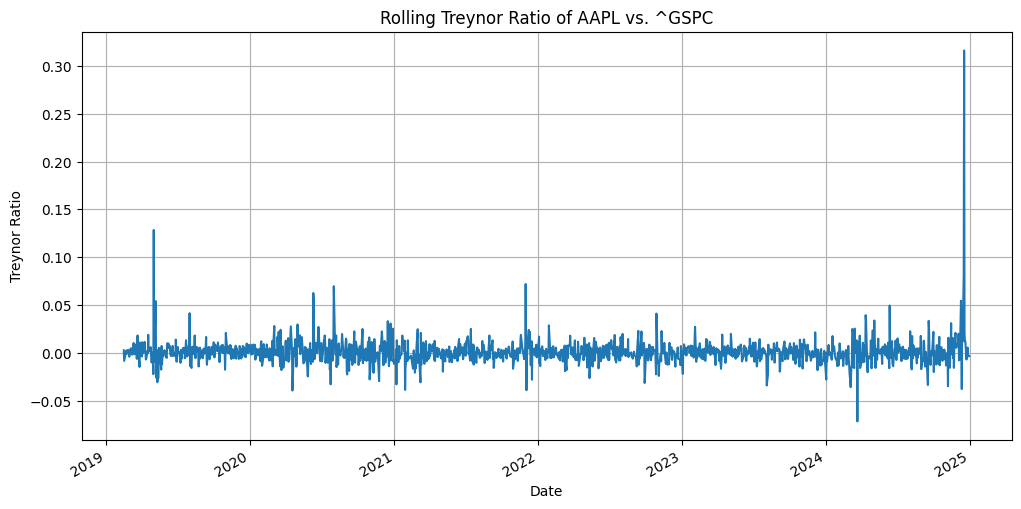

In [22]:
rolling_treynor.plot(figsize=(12, 6))
plt.title(f"Rolling Treynor Ratio of {ticker} vs. {benchmark}")
plt.xlabel("Date")
plt.ylabel("Treynor Ratio")
plt.grid(True)
plt.show()